In [74]:
# code here
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [75]:
def circle_maker(radius): # Lab7
    diameter = radius * 2 + 1
    center = radius
    structure = np.zeros((diameter, diameter), dtype=np.uint8)
    for i in range(diameter):
        for j in range(diameter):
            distance = np.sqrt((i - center) ** 2 + (j - center) ** 2)
            if distance <= radius:
                structure[i, j] = 1
    return structure

1) Aplique nas imagens abaixo o algortimo Watershed para realizar a contagem de células. Faça tanto para  a imagem original e para a imagem gradiente

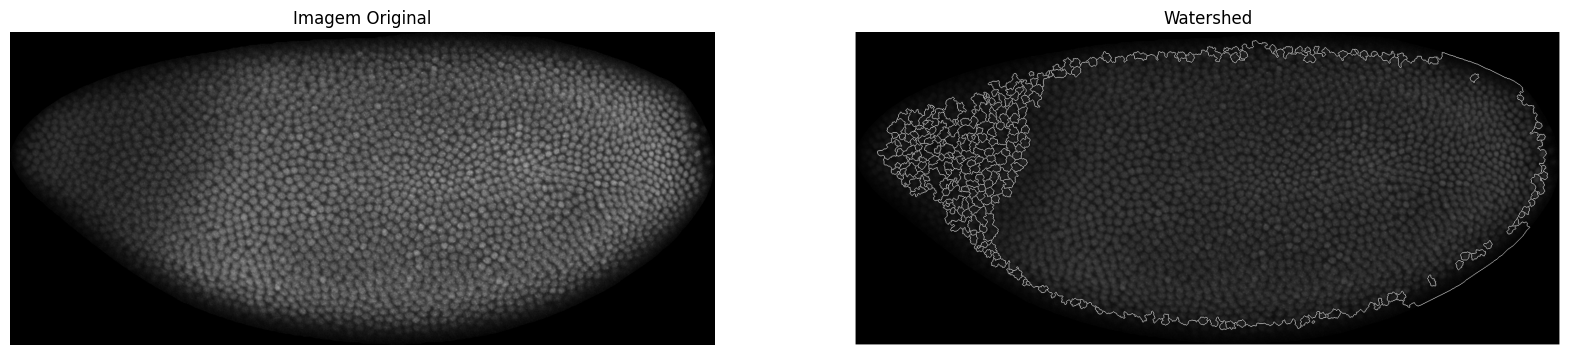

Número de elementos na imagem: 277


In [80]:
img1 = cv2.imread("image.jpg", cv2.IMREAD_GRAYSCALE)

def watershed_and_show(img, kernel_size=5, opening_iterations=2, dilation_iterations=10, sure_threshold=0.1):
    ret, threshold = cv2.threshold(img, 0, 255, cv2.THRESH_OTSU)  # Fazendo Threshold com Otsu
    kernel = circle_maker(kernel_size)  # Kernel 
    opening = cv2.morphologyEx(threshold, cv2.MORPH_OPEN, kernel, iterations=opening_iterations)  # Abertura
    dilation = cv2.dilate(opening, kernel, iterations=dilation_iterations)  # Dilatação
    dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)  # Distância
    ret, sure_fg = cv2.threshold(dist_transform, sure_threshold * dist_transform.max(), 255, 0)

    sure_fg = np.uint8(sure_fg)
    unknown = cv2.subtract(dilation, sure_fg)
    ret, markers = cv2.connectedComponents(sure_fg)
    markers = markers + 1
    markers[unknown == 255] = 0

    img_bgr = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

    markers = cv2.watershed(img_bgr, markers)
    img_bgr = (img_bgr / 2).astype(np.uint8)  # Diminuir a intensidade
    img_bgr[markers == -1] = [255, 255, 255]  # Contorno dos objetos

    plt.figure(figsize=(20, 10))

    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)
    plt.title('Imagem Original')
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(img_bgr)
    plt.title('Watershed')
    plt.axis("off")

    plt.show()

    unique_markers = np.unique(markers)
    num_elements = len(unique_markers) - 1  # Subtrair 1 para excluir o marcador de fundo
    print(f"Número de elementos na imagem: {num_elements}")



watershed_and_show(img1, kernel_size=1, opening_iterations=1, dilation_iterations=100, sure_threshold=0.01)

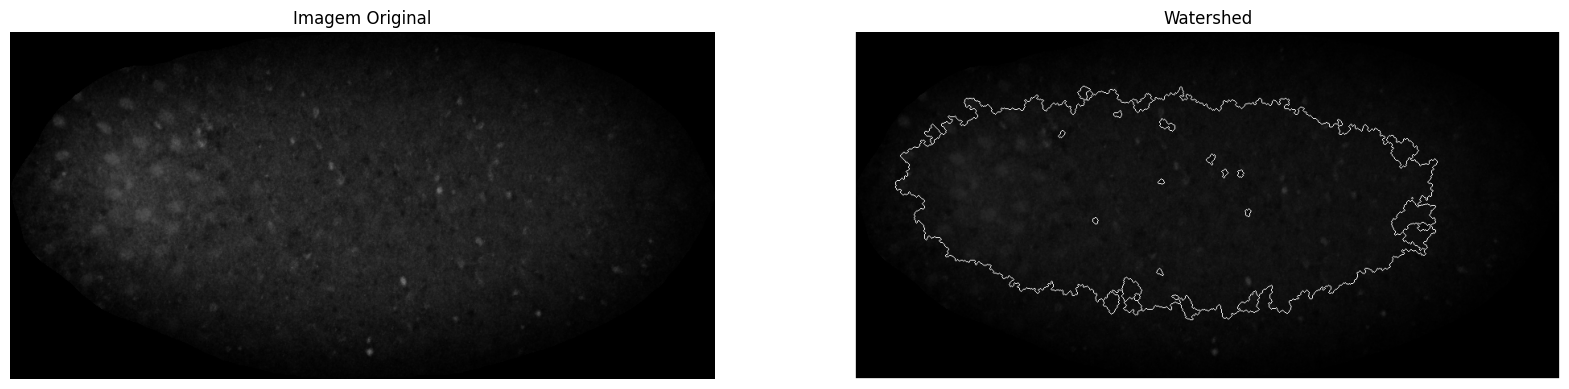

Número de elementos na imagem: 16


In [94]:
img2 = cv2.imread("image2.jpg", cv2.IMREAD_GRAYSCALE)

watershed_and_show(img2, kernel_size=1, opening_iterations=1, dilation_iterations = 1, sure_threshold=0.1)

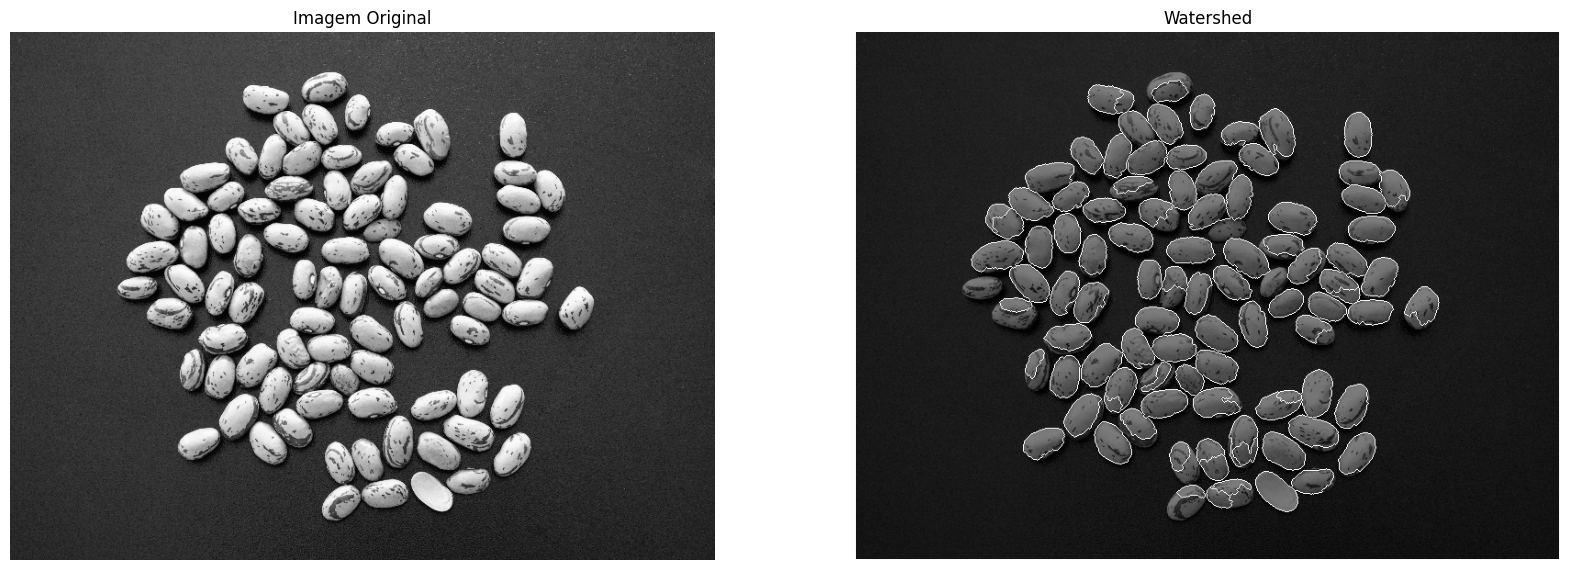

Número de elementos na imagem: 96


In [113]:
img3 = cv2.imread("feijao.jpg", cv2.IMREAD_GRAYSCALE)
img3 = cv2.resize(img3, (int(img3.shape[1] / 6), int(img3.shape[0] / 6)))
watershed_and_show(img3, kernel_size=3, opening_iterations=2, dilation_iterations=5)